# Chapter: 5
## Section: Regularization to improve model generalizability

In [1]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
# determining random state for data split and model initialization
random_state = 42
# loading and splitting digit data to train and test sets
digits = datasets.load_digits()
x = digits.data
y = digits.target
# validating using stratified k-fold (k=5) cross-validation
stratified_kfold_cv = StratifiedKFold(n_splits = 5, shuffle=True, random_state=random_state)
# function for plotting the CV score across different hyperparameter values
def reg_search_plot(search_fit, parameter: str):
  """
  :param search_fit: hyperparameter search object after model fitting
  :param parameter: hyperparameter name

  """
  parameters = [search_fit.cv_results_['params'][iter][parameter]
                for iter in range(0, len(search_fit.cv_results_['params']))]
  mean_test_score = search_fit.cv_results_['mean_test_score']
  plt.scatter(parameters, mean_test_score)
  plt.xticks(fontsize = 12)
  plt.yticks(fontsize = 12)
  plt.xlabel(parameter, fontsize = 12)
  plt.ylabel('accuracy', fontsize = 12)
  plt.show()

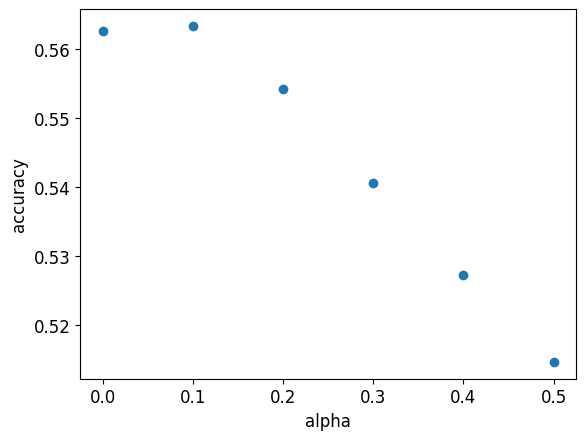

In [2]:
# Defining hyperparameter grid
parameter_grid = {"alpha": [0, 0.1, 0.2, 0.3, 0.4, 0.5]}
# generating the grid search
lasso_search = GridSearchCV(Lasso(random_state = random_state),
                            parameter_grid,
                            cv = stratified_kfold_cv,
                            n_jobs=-1)
# fitting the grid search cross-validation
lasso_search.fit(x, y)

reg_search_plot(search_fit = lasso_search, parameter = 'alpha')

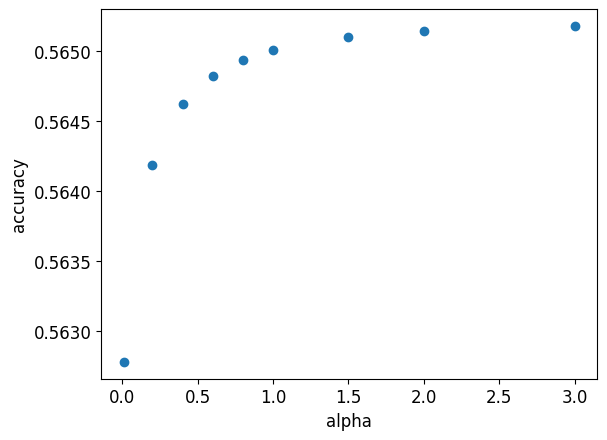

In [3]:
# Defining hyperparameter grid
parameter_grid = {"alpha": [0.01, 0.2, 0.4, 0.6, 0.8, 1, 1.5, 2, 3]}
# generating the grid search
ridge_search = GridSearchCV(Ridge(random_state = random_state),
                            parameter_grid,
                            cv = stratified_kfold_cv,
                            n_jobs=-1)
# fitting the grid search cross-validation
ridge_search.fit(x, y)

reg_search_plot(search_fit = ridge_search, parameter = 'alpha')

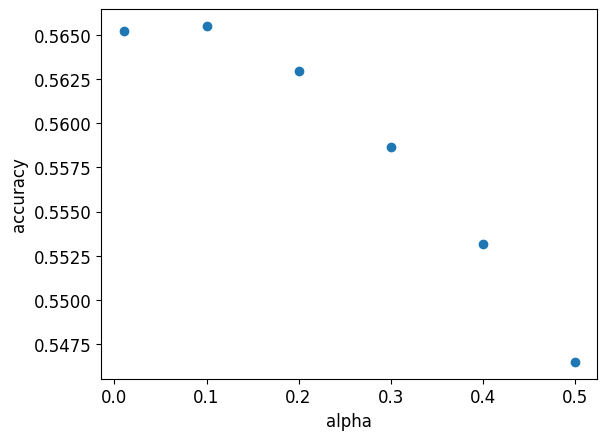

In [4]:
# Defining hyperparameter grid
parameter_grid = {"alpha": [0.01, 0.1, 0.2, 0.3, 0.4, 0.5]}
# generating the grid search
enet_search = GridSearchCV(ElasticNet(l1_ratio = 0.5, random_state = random_state),
                           parameter_grid,
                           cv = stratified_kfold_cv,
                           n_jobs=-1)
# fitting the grid search cross-validation
enet_search.fit(x, y)

reg_search_plot(search_fit = enet_search, parameter = 'alpha')

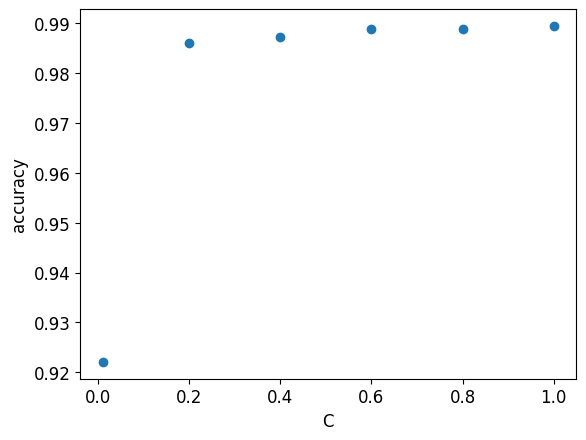

In [5]:
from sklearn.svm import SVC
# Defining hyperparameter grid
parameter_grid = {"C": [0.01, 0.2, 0.4, 0.6, 0.8, 1]}
# generating the grid search
svc_search = GridSearchCV(SVC(kernel = 'poly', random_state = random_state),
                          parameter_grid,
                          cv = stratified_kfold_cv,
                          n_jobs=-1)
# fitting the grid search cross-validation
svc_search.fit(x, y)

reg_search_plot(search_fit = svc_search, parameter = 'C')